<a href="https://colab.research.google.com/github/sanjenawaaii/colabtools/blob/main/augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install clodsa

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.2/276.2 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clodsa: filename=clodsa-1.2.48-py2.py3-none-any.whl size=74305 sha256=ade9f014547db8207fb40341609f98afe33f0890edec9f633a6344749f6b43ab
  Stored in directory: /root/.cache/pip/wheels/57/64/44/4e5198b63c87ac87f1560d7a9625fa1ce34699de407bb2d41c
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12072 sha256=984ed234448d3ddfe324a2911e90946a64e164506e6d87f3bf32ddc126f31ab6
  Stored in directory: /root/.cache/pip/wheels/7d/90/23/6358a234ca5b4ec0866d447079b97fedf9883387d1d7d074e5
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62511 sha256=1d0fcf629e37cfd0b71a5e0355610375f3ec636ab49492e1bae7e415cc44ba1d
  Stored in directory: /

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
import os

In [ ]:
os.makedirs("/content/dataset")

FileExistsError: ignored

In [ ]:
! sudo cp -v -r "/content/drive/MyDrive/Dataset/Bangla_License_Plate.zip" "/content/dataset"

'/content/drive/MyDrive/Dataset/Bangla_License_Plate.zip' -> '/content/dataset/Bangla_License_Plate.zip'


In [ ]:
!unzip "/content/drive/MyDrive/Dataset/Bangla_License_Plate.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Bangla_License_Plate/1146.jpg  
  inflating: /content/dataset/Bangla_License_Plate/1146.txt  
  inflating: /content/dataset/Bangla_License_Plate/1147.jpg  
  inflating: /content/dataset/Bangla_License_Plate/1147.txt  
  inflating: /content/dataset/Bangla_License_Plate/1148.jpg  
  inflating: /content/dataset/Bangla_License_Plate/1148.txt  
  inflating: /content/dataset/Bangla_License_Plate/1149.jpg  
  inflating: /content/dataset/Bangla_License_Plate/1149.txt  
  inflating: /content/dataset/Bangla_License_Plate/115.jpeg  
  inflating: /content/dataset/Bangla_License_Plate/115.txt  
  inflating: /content/dataset/Bangla_License_Plate/1150.jpg  
  inflating: /content/dataset/Bangla_License_Plate/1150.txt  
  inflating: /content/dataset/Bangla_License_Plate/1151.jpg  
  inflating: /content/dataset/Bangla_License_Plate/1151.txt  
  inflating: /content/dataset/Bangla_License_Plate/1152.jpg  
  inflating: /conten

In [ ]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "NP_images_yolov5"
INPUT_PATH = "/content/dataset/Bangla_License_Plate/"
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

### Load an image

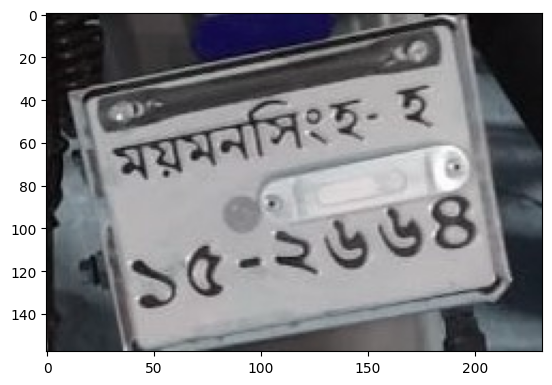

In [ ]:
img = cv2.imread("/content/dataset/Bangla_License_Plate/1.jpeg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img)

# Yolo image augmentation

In [ ]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [ ]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])


Showing Image with bounding boxes

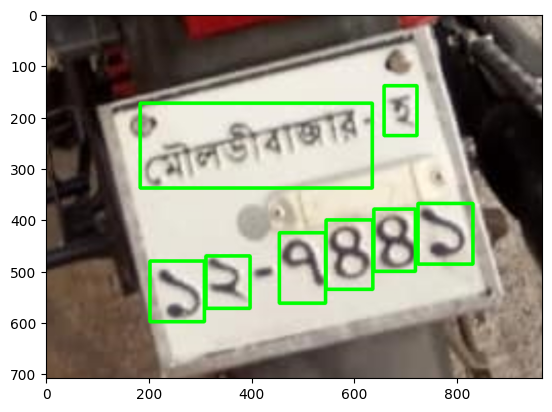

In [ ]:
img,boxes = boxesFromYOLO("/content/dataset/Bangla_License_Plate/1443.jpg" , "/content/dataset/Bangla_License_Plate/1443.txt")
showBoxes(img,boxes)

Define a transformer generator.


In [ ]:
transformer = transformerGenerator(PROBLEM)

### Vertical Flip

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

Showing the augmentation result

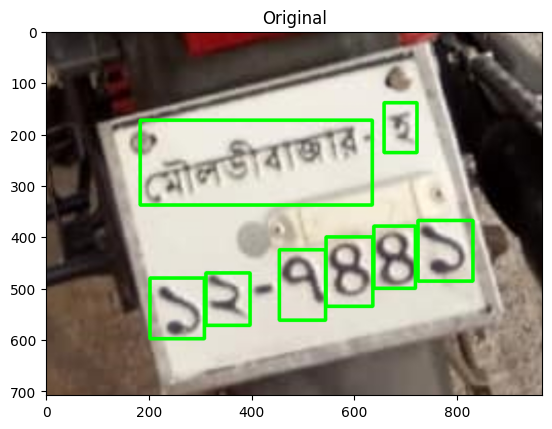

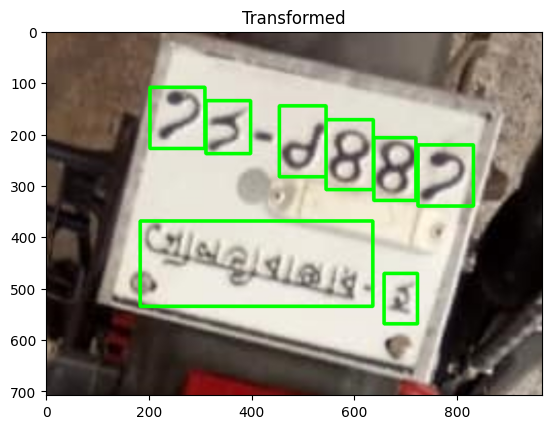

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

### Horizontal Flip

In [ ]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

Showing the augmentation result

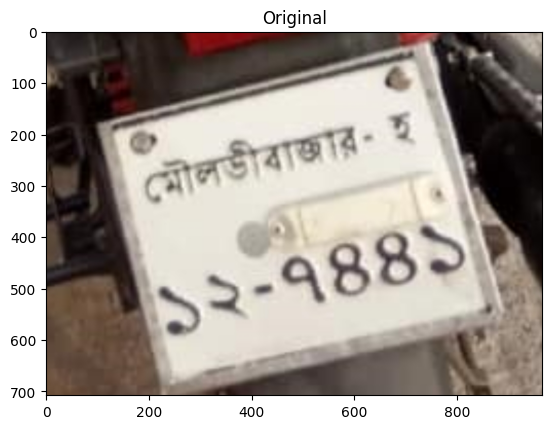

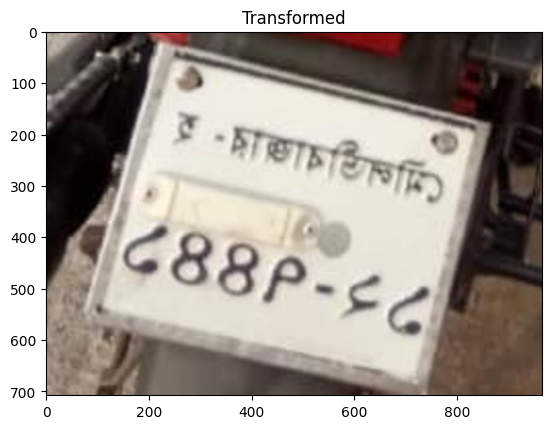

In [ ]:
imgFlip = hFlip.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(imgFlip[:,:,::-1])

### Horizontally and Vertically Flip

In [ ]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

Showing the augmentation result

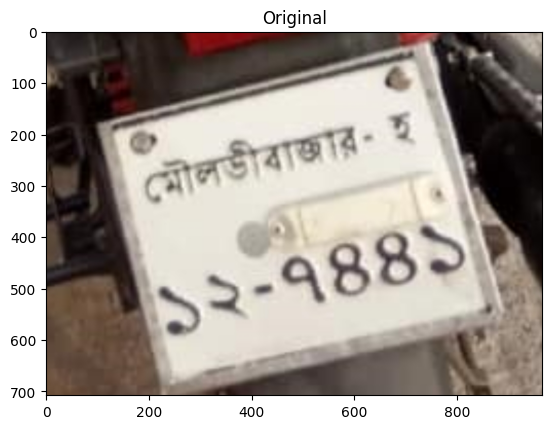

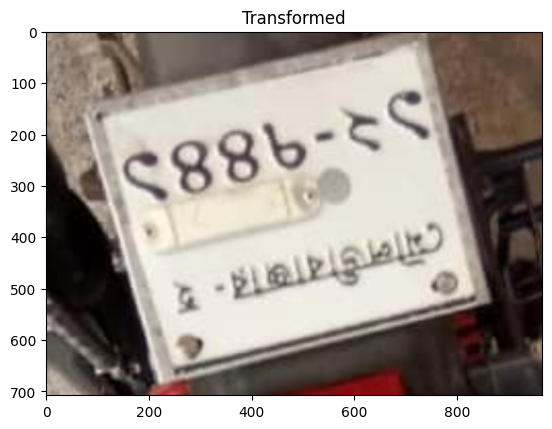

In [ ]:
imgFlip = hvFlip.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(imgFlip[:,:,::-1])

### Rotation

In [ ]:
rotate = createTechnique("rotate", {"angle" : 45})
augmentor.addTransformer(transformer(rotate))

Showing augmentation result

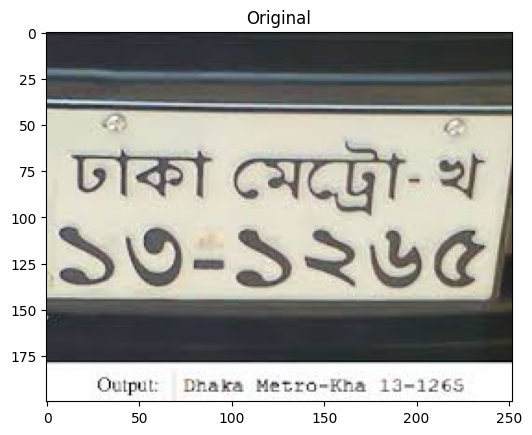

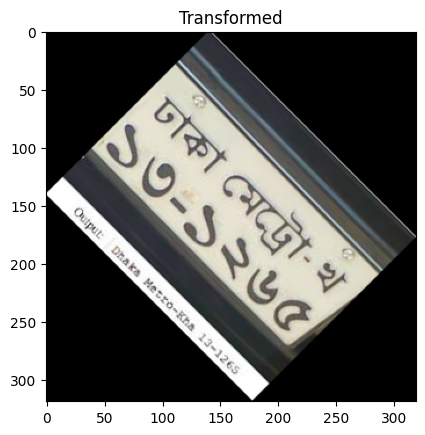

In [ ]:
imgFlip = rotate.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(imgFlip[:,:,::-1])

### Average Blur

Showing augmentation result

Drop

In [ ]:
drp  =createTechnique("dropout",{"percentage":0.10})
augmentor.addTransformer(transformer(drp))


Result

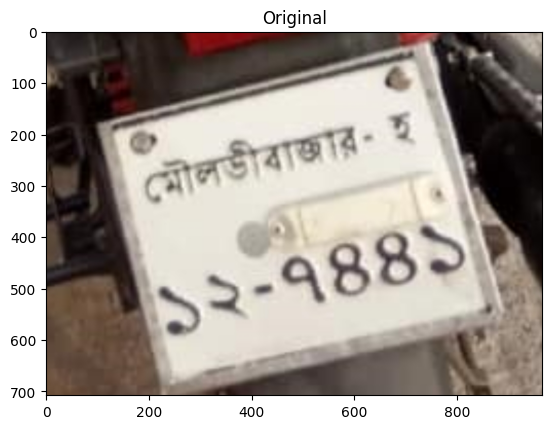

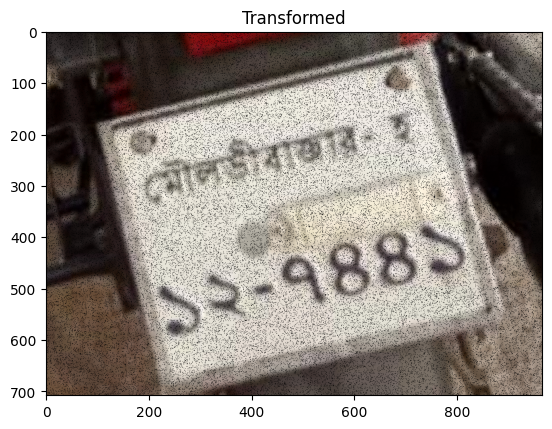

In [ ]:
imgFlip = drp.apply(img)
plt.figure()
plt.title("Original")
plt.imshow(img[:,:,::-1])
plt.figure()
plt.title("Transformed")
plt.imshow(imgFlip[:,:,::-1])

In [ ]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

In [ ]:
import os

# Specify the path to the file you want to delete
file_path = "/content/dataset/Bangladeshi_Vehicle_Image_with_visible_license_plate/classes.txt"

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
  print(f"{file_path} does not exist.")


/content/dataset/Bangladeshi_Vehicle_Image_with_visible_license_plate/classes.txt does not exist.


In [ ]:
import os

# Specify the path to the directory you want to count files in
directory_path = "/content/dataset/Bangla_License_Plate/"

# Use os.listdir() to get a list of all files and directories in the specified directory
all_files = os.listdir(directory_path)

# Initialize a counter for files
file_count = 0

# Iterate through the items in the directory
for item in all_files:
    item_path = os.path.join(directory_path, item)

    # Check if the item is a file (not a directory)
    if os.path.isfile(item_path) and item.endswith(".txt"):
      file_count += 1


print(f"Number of files in {directory_path}: {file_count}")

Number of files in /content/dataset/Bangla_License_Plate/: 2665


In [ ]:
# Specify the path to the directory you want to count files in
directory_path = "/content/dataset/Bangla_License_Plate/"

# Initialize a counter for other files
other_file_count = 0

# Use os.listdir() to get a list of all files and directories in the specified directory
all_files = os.listdir(directory_path)

# List of file extensions to exclude
exclude_extensions = (".txt")

# Iterate through the items in the directory
for item in all_files:
    item_path = os.path.join(directory_path, item)

    # Check if the item is a file and its extension is not in the exclude list
    if os.path.isfile(item_path) and not item.lower().endswith(exclude_extensions):
        other_file_count += 1

print(f"Number of other files in {directory_path}: {other_file_count}")

Number of other files in /content/dataset/Bangla_License_Plate/: 2665


In [ ]:
import os

# Specify the path to the directory you want to analyze
directory_path = "/content/dataset/Bangla_License_Plate/"

# Create a set to store unique file extensions
file_formats = set()

# Use os.listdir() to get a list of all files and directories in the specified directory
all_files = os.listdir(directory_path)

# Iterate through the items in the directory
for item in all_files:
    item_path = os.path.join(directory_path, item)

    # Check if the item is a file
    if os.path.isfile(item_path):
        # Extract the file extension (everything after the last dot)
        file_extension = item.split('.')[-1].lower()

        # Add the file extension to the set
        file_formats.add(file_extension)

# Print the unique file formats found in the directory
print(f"File formats in {directory_path}: {', '.join(file_formats)}")


File formats in /content/dataset/Bangla_License_Plate/: txt, jpg, jpeg


In [ ]:
augmentor.applyAugmentation()

In [ ]:
print("Number of images in the folder")
!ls -1 NP_images_yolov5/* | wc -l
print("Number of annotations in the folder")
!ls -1 NP_images_yolov5/ | wc -l

Number of images in the folder
26650
Number of annotations in the folder
26650


In [ ]:
!zip -r augmented_images_yolo.zip NP_images_yolov5
from google.colab import files
files.download('augmented_images_yolo.zip')

Streaming output truncated to the last 5000 lines.
  adding: NP_images_yolov5/1755_3_1962.jpg (deflated 1%)
  adding: NP_images_yolov5/2579_3_2152.jpg (deflated 1%)
  adding: NP_images_yolov5/2196_2_2487.jpg (deflated 1%)
  adding: NP_images_yolov5/811_1_791.txt (deflated 54%)
  adding: NP_images_yolov5/523_2_1679.jpg (deflated 2%)
  adding: NP_images_yolov5/1858_0_2147.txt (deflated 60%)
  adding: NP_images_yolov5/1143_2_1716.txt (deflated 59%)
  adding: NP_images_yolov5/1802_4_2245.jpg (deflated 1%)
  adding: NP_images_yolov5/2405_0_1047.jpg (deflated 13%)
  adding: NP_images_yolov5/751_4_1492.jpg (deflated 1%)
  adding: NP_images_yolov5/593_2_1622.txt (deflated 52%)
  adding: NP_images_yolov5/947_4_70.jpg (deflated 3%)
  adding: NP_images_yolov5/1861_4_669.txt (deflated 54%)
  adding: NP_images_yolov5/105_4_1235.jpg (deflated 18%)
  adding: NP_images_yolov5/513_0_480.txt (deflated 67%)
  adding: NP_images_yolov5/32_1_997.jpg (deflated 1%)
  adding: NP_images_yolov5/1714_1_1163.jpg (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>